## <center>All about CO2 and CCS</center>
<center><i>Author: M Steel</i></center>

### <center>1. Climate Change</center>

Carbon Dioxide (CO2) is both a naturally-occurring and man-made gas. The early works of Arrhenius (1986) and Chamberlin (1899) described the presence of CO2 in the atmospheres and gave early predictions on the impact of a rise in atmospheric CO2 and the expected rise in global temperature. In the following century, our working knowledge on the mechanisms of CO2 transport and understanding of the risks posted by increasing atmospheric CO2 has significantly increased. In the 20th century alone, anthropogenic (man-made) CO2 has contributed to a global temperature rise of $1 ^\circ C$, with an anticipated rise of $0.2 ^\circ C$ per decade following current trends (IPCC, 2021). However, as the Earth's climactic system operatres with a thermal inertia, we are still currently in a position to mitigate the worst effects of climate change (Hansen et al., 2005).

To remain in line with the Paris Agreement, globally more action needs to be taken to mitigate additional climactic acceleration from anthropogenic CO2. An industry with strong potential to signficantly contribute towards mitigating climate change is Carbon Capture and Storage (CCS). In 2020, the capacity of CO2 sequestration from CCS project was 75 million tonnes per year (Mpta) which increased to 111 Mtpa in 2021 (Global CCS Institute, 2021). With the capacity of CO2 sequestration increasing year on year, the impact of CCS on mitigating the effects of climate change is becoming more prevalent.


### <center>2. Carbon Capture and Storage</center>

CCS is a process whereby captured CO2, either directly from the burning of fossil fuels or from extraction from mixed gases, is compressed and injected into deep geologic subsurface storage reservoirs. The geologic storage complex requires:

- A porous, permeable reservoir rock, for storage of the CO2 within the pore space of the rock
- An impermeable cap rock, which acts as a barrier for vertical migrations of the CO2 from the reservoir rock
- Stratigraphic or structural trapping, to prevent lateral migration of CO2 beyond the spill points of the overburden

There are 27 CCS projects currently active in both marine (e.g. Furre et al., 2016) and terrestrial (e.g. Worth et al., 2014) environments, with a further 106 CCS facilities in various stages of development (Global CCS Institute, 2021). The CCS project covers all aspects from initial scoping through to monitoring post-injection (Figure 1). During the injection phase, accurate assurance and validation is essential in ensuring good stakeholder relations and compliance with regulatory standards (Le Calvez et al., 2014). Remaining compliant with regulatory standards and having appropriate monitoring and contingency planning aid the public perception of CCS as a safe industry (Jenkins et al., 2012).

<center><img src = "./notebook_figures/ccs_workflow.png"></img></center>
<center><b>Figure 1:</b> <i>Simplified CCS workflow. Figure from Le Calvez et al. (2014)</i></center>

### <center>3. Properties of CO2</center>

During the injection phase of a CCS project, extracted CO2 is cooled and pressurised into its supercritical phase. The <u>critical point</u> for CO2 is found at $31.1 \dot C$ and 73.7 bar (Span and Wagner, 1994) (Figure 2). For a typical lithostatic pressure (~23 kPa/m) and temperature ($~30 ^\circ C/km$) this places the critical depth for CO2 storage at ~800 m (Chadwick et al., 2008).

<center><img src="./Figures/phase_diagram.png"></img></center>
<center><b>Figure 2:</b> <i>Phase diagram for pure CO2 in temperature and pressure. Figure from Stasa et al. (2013)</i></center>

<i>Below, I will show some further examples of the different properties of CO2</i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#!pip install -q coolprop
from CoolProp.CoolProp import PropsSI

plt.style.use("mpsplot_default")

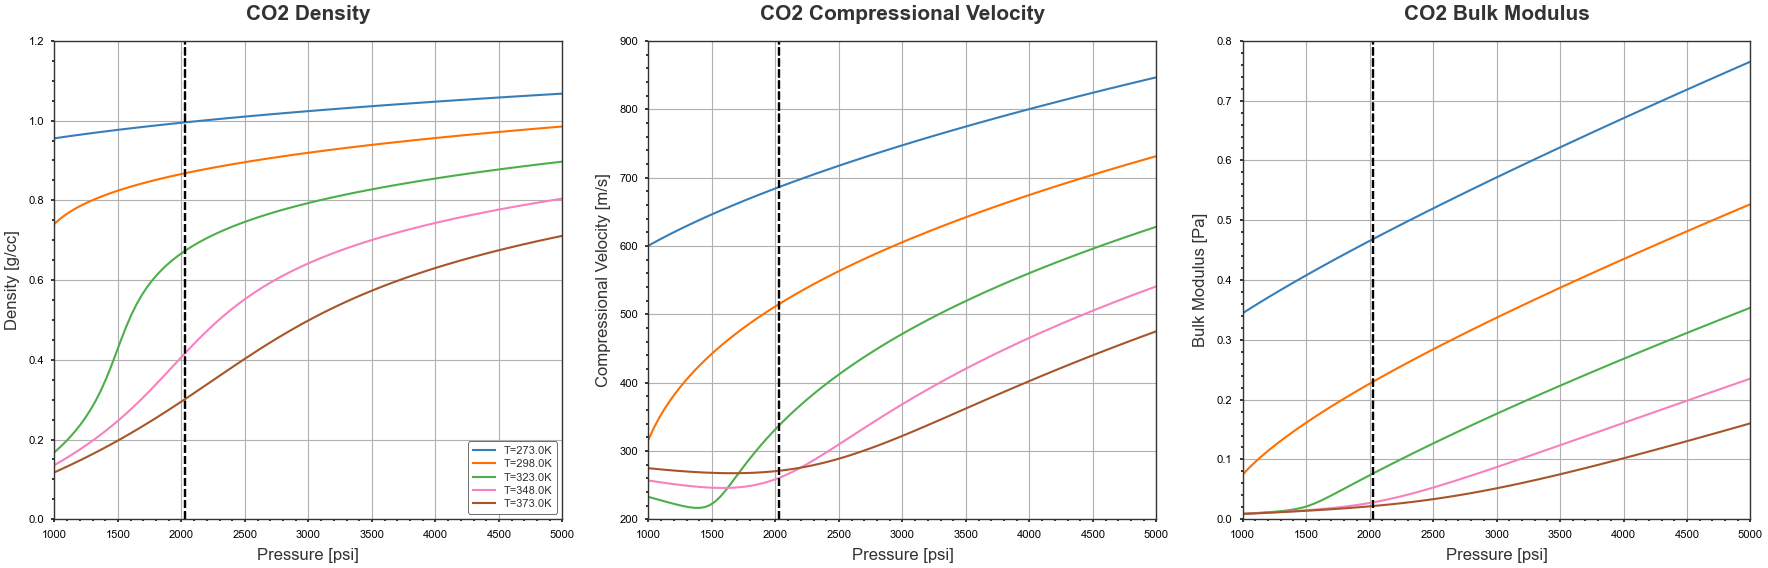

In [6]:
# Temperature and pressure ranges here are representative of the Endurance Field, see notebook 01 for more information!

T = np.linspace(273, 373, 5) # Temperature in K
P_psi = np.linspace(1000, 5000, 100) # Pressure in psi
P = P_psi * 6895 # to Pa

plt.figure(figsize=(18,6))
for i in range(len(T)):
  rho = PropsSI('D', 'T', T[i], 'P', P, 'CO2') / 1000  # D: request density in kg/m3, convert to g/cc
  vp = PropsSI('A', 'T', T[i], 'P', P, 'CO2')  # A: speed of sound in m/s
  K = (rho * vp**2) / 1E+06
  
  plt.subplot(1,3,1)
  plt.plot(P_psi, rho, label="T={}K".format(T[i]))
  plt.vlines(x=2030,ymin=0,ymax=1.2,color='black',linestyle='dashed')
  plt.grid()
  plt.xlim(min(P_psi), max(P_psi))
  plt.xlabel("Pressure [psi]",size=12); plt.ylabel("Density [g/cc]",size=12)
  plt.title("CO2 Density",size=15,pad=15)
  plt.legend(loc="lower right")
  plt.ylim(0,1.2)

  plt.subplot(1,3,2)
  plt.plot(P_psi, vp, label="T={}K".format(T[i]))
  plt.vlines(x=2030,ymin=200,ymax=900,color='black',linestyle='dashed')
  plt.grid()
  plt.xlim(min(P_psi), max(P_psi))
  plt.xlabel("Pressure [psi]",size=12); plt.ylabel("Compressional Velocity [m/s]",size=12)
  plt.title("CO2 Compressional Velocity",size=15,pad=15)
  plt.ylim(200,900)
  # plt.legend()

  plt.subplot(1,3,3)
  plt.plot(P_psi,K, label="T={}K".format(T[i]))
  plt.vlines(x=2030,ymin=0,ymax=0.8,color="black",linestyle="dashed")
  plt.grid()
  plt.xlim(min(P_psi), max(P_psi))
  plt.xlabel("Pressure [psi]",size=12); plt.ylabel("Bulk Modulus [Pa]",size=12)
  plt.title("CO2 Bulk Modulus",size=15,pad=15)
  plt.ylim(0,0.8)
  #plt.legend

plt.tight_layout()
plt.show()
#plt.savefig("CO2_Properties.png")